__Liudmila Semenova  
UDACITY Data Analyst Nanodegree Program  
2019, August 20__

# Communicate Data Findings
## Express Entry Permanent Residence Applications Data Exploration

- [Introduction](#intro)   
- [Preliminary Wrangling](#preliminary_wrangling)   
- [Univariate Exploration](#univariate_exploration)   
    - [Part I](#univariate_exploration_1)   
    - [Part II](#univariate_exploration_2)   
    - [Part III](#univariate_exploration_3)   
- [Bivariate Exploration](#bivariate_exploration)   
- [Multivariate Exploration](#multivariate_exploration)   

<a id='intro'></a>
## Introduction

The subject of this exploration analysis is an Canadian Immigration Express Entry Permanent Residence Applications dataset from [MyImmigrationTracker](https://www.myimmitracker.com). 

MyImmiTrackeris a collaborative community project which allows immigrant applicants to enter and then track and analyze the progress of their applications.

Express Entry is a system used by the Canadian government to manage applications for Canadian permanent residence through certain economic immigration programs: Federal Skilled Workers (FSW), Canadian Experience Class (CEC) and Provincial Nominee Program (PNP).

The dataset containing more than 19,000 immigration complete and incomplete cases covering the period from April, 2015 to August, 2019. All dates and statuses of the incomplete cases are valid at the time of gathering data on August 6, 2019.

The raw dataset was cleaned and stored in *cases_master.csv* for further analysis.

<a id='preliminary_wrangling'></a>
## Preliminary Wrangling

In [2490]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import calendar

%matplotlib inline

In [2491]:
# load in the dataset into a pandas dataframe
cases = pd.read_csv('cases_master.csv')

In [2492]:
# overview of dataframe shape
cases.shape

(19193, 16)

In [2493]:
# overview of columns and datatypes
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19193 entries, 0 to 19192
Data columns (total 16 columns):
case                     19193 non-null int64
current_status           19193 non-null object
aor_date                 19193 non-null object
stream                   19193 non-null object
dependents               19193 non-null object
province                 19193 non-null object
nationality              19193 non-null object
residence                19193 non-null object
visa_office              19193 non-null object
med_passed_date          19193 non-null object
add_docs_request_date    19193 non-null object
rprf_paid_date           19193 non-null object
ss_start_date            19193 non-null object
final_decision           19193 non-null object
final_decision_date      19193 non-null object
state                    19193 non-null object
dtypes: int64(1), object(15)
memory usage: 2.3+ MB


In [2494]:
# overview of the dataframe
cases.head(5)

,case,current_status,aor_date,stream,dependents,province,nationality,residence,visa_office,med_passed_date,add_docs_request_date,rprf_paid_date,ss_start_date,final_decision,final_decision_date,state
0,79313,e-APR AOR,2019-08-06,CEC,0,None,India,Canada,Unspecified,Pending,None,2019-08-06,None,None,Pending,Active
1,79299,e-APR AOR,2019-08-06,FSW-Outland,0,None,Philippines,Philippines,Unspecified,Pending,None,2019-08-06,None,None,Pending,Active
2,79242,e-APR AOR,2019-08-06,PNP-Outland,0,Ontario,Iran,Iran,Unspecified,Pending,None,2019-08-06,None,None,Pending,Active
3,79260,e-APR AOR,2019-08-05,FSW-Outland,2,None,India,India,Unspecified,Pending,None,2019-08-05,None,None,Pending,Active
4,79237,e-APR AOR,2019-08-05,CEC,0,None,India,Canada,Unspecified,Pending,None,2019-08-05,None,None,Pending,Active


In [2495]:
# overview of the dataframe
cases.tail(5)

,case,current_status,aor_date,stream,dependents,province,nationality,residence,visa_office,med_passed_date,add_docs_request_date,rprf_paid_date,ss_start_date,final_decision,final_decision_date,state
19188,3460,PPR,2015-06-05,CEC,0,None,India,Unspecified,Unspecified,Pending,None,2015-06-05,None,PPR,2015-08-17,Active
19189,3458,PPR,2015-05-15,CEC,0,None,India,Unspecified,Unspecified,Pending,None,2015-05-15,None,PPR,2015-09-28,Active
19190,3682,PPR,2015-05-10,FSW-Outland,0,None,Pakistan,Unspecified,Unspecified,Pending,None,2015-05-10,None,PPR,2015-07-21,Active
19191,3454,PPR,2015-04-25,FSW-Outland,0,None,India,Unspecified,Unspecified,Pending,None,2015-04-25,None,PPR,2015-07-29,Active
19192,3459,PPR,2015-04-15,FSW-Outland,0,None,India,Unspecified,Unspecified,Pending,None,2015-04-15,None,PPR,2015-08-11,Active


### What is the structure of your dataset?

There are 19,193 cases in the dataset with 16 features. 

One part of them describes the applicantion case:   

**case** - the unique applicantion case id   
**stream** - the name of the applicant's immigration program: FSW-Outland, FSW-Inland, CEC, PNP-Outland, PNP-Inland    
**current_status** - the current status of the application case in terms of mandatory processing stages: e-APR AOR, Medicals Passed, PPR/Refused      
**dependents** - the number of applicant's family members who immigrate as well       
**province**  - the name of the province for the applicantions with provincial nominations (PNP-Outland and PNP-Inland streams)      
**nationality** - the applicant's country of nationality      
**residence** - the applicant's country of residence      
**visa_office** - the office where applicantion case is/were processing      
**final_decision** - whether the case was approved (PPR) or refused (Refused)

The other part reflects dates of application processing stages completion:             

**aor_date** - the date when application documents were submitted (mandatory)   
**med_passed_date**  - the date when applicant's medical examination were approved (mandatory)                  
**add_docs_request_date** - the date when additional documents were requested if there was this stage (optional)     
**rprf_paid_date** - the date when applicant paid processing fee (mandatory)          
**ss_start_date** - the date when security screening was started if there was this stage (optional)        
**final_decision_date** - the date when the case was approved or refused (mandatory)     

The last features describes applicant's profile activity on [MyImmigrationTracker](https://www.myimmitracker.com):   

**state** - whether there has been any activity on the applicant's profile in the last 2 months     

Most variables are categorical nominal and ordinal and all dates are date/time variables.

### What are the main features of interest in your dataset?

The main goal of this analysis is to analyze application processing time (span of time berween the date when application documents were submited and the date when the case was finalised) and to find out if there are any relationship between case features and application processing time. 

I am also interested in discovering any trends of application processing time from year to year and changes of numbers of finalized cases from month to month each year.

### What features in the dataset do you think will help support your investigation into your features of interest?

I expect that the presence of the optional application processing stages like additional documents request stage and security screening stage have strongest effect on application processing time. I also believe that applicantion case features like a stream, a number of dependents, a province of a nomination, countries of nationality and residence, a visa office affect the application processing time as well. 

To analyze application processing time I should get a subset of only complete cases which were approved or refused and create a new column with application processing time in days.

I also should add two columns which will describes the applicantion case in terms of optional application processing stages: *add_docs_request* with yes/no values and *security_screening* with yes/no values.

In [2496]:
# create dataframe for only complete cases
complete_cases = cases.query('final_decision != "None"' ).copy()

# convert variables to datetime
complete_cases.final_decision_date = pd.to_datetime(complete_cases.final_decision_date)
complete_cases.aor_date = pd.to_datetime(complete_cases.aor_date)

# create a new column processing_days
complete_cases['processing_days'] = (complete_cases['final_decision_date'] - complete_cases['aor_date'])

# create two additional columns: additional documents request stage (add_docs_request) and 
# security screening (ss) with yes-no values

for index, row in complete_cases.iterrows():
    if row.add_docs_request_date != 'None':
        complete_cases.loc[index, 'add_docs_request'] = 'Yes'
    else:
        complete_cases.loc[index, 'add_docs_request'] = 'No'
    if row.ss_start_date != 'None':
        complete_cases.loc[index, 'security_screening'] = 'Yes'
    else: 
        complete_cases.loc[index, 'security_screening'] = 'No'

# order the columns        
complete_cases = complete_cases[['case', 'aor_date', 'stream', 'current_status', 'dependents', 'province', 
                                'nationality', 'residence', 'visa_office', 'med_passed_date', 'add_docs_request', 
                                'add_docs_request_date', 'rprf_paid_date', 'security_screening', 'ss_start_date', 
                                'final_decision_date', 'final_decision', 'processing_days', 'state']]

# create a new column processing_days
complete_cases['processing_days'] = (complete_cases['final_decision_date'] - complete_cases['aor_date']).dt.days

# create two additional columns: additional documents request stage (add_docs_request) and 
# security screening (ss) with yes-no values

for index, row in complete_cases.iterrows():
    if row.add_docs_request_date != 'None':
        complete_cases.loc[index, 'add_docs_request'] = 'Yes'
    else:
        complete_cases.loc[index, 'add_docs_request'] = 'No'
    if row.ss_start_date != 'None':
        complete_cases.loc[index, 'security_screening'] = 'Yes'
    else: 
        complete_cases.loc[index, 'security_screening'] = 'No'

# order the columns        
complete_cases = complete_cases[['case', 'aor_date', 'stream', 'current_status', 'dependents', 'province', 
                                'nationality', 'residence', 'visa_office', 'med_passed_date', 'add_docs_request', 
                                'add_docs_request_date', 'rprf_paid_date', 'security_screening', 'ss_start_date', 
                                'final_decision_date', 'final_decision', 'processing_days', 'state']]

# delete rows where processing_days values equal or less than 0
complete_cases = complete_cases.drop(complete_cases[complete_cases.processing_days <= 0].index)

# reset indices
complete_cases = complete_cases.reset_index(drop = True)

# convert columns to categorical
complete_cases.add_docs_request = complete_cases.add_docs_request.astype('category')
complete_cases.security_screening = complete_cases.security_screening.astype('category')
complete_cases.dependents = complete_cases.dependents.astype('category')
complete_cases.stream = complete_cases.stream.astype('category')
complete_cases.province = complete_cases.province.astype('category')
complete_cases.final_decision = complete_cases.final_decision.astype('category')
complete_cases.current_status = complete_cases.current_status.astype('category')
complete_cases.state = complete_cases.state.astype('category')

# check the result
print('\nDataframe shape: rows - {}\n, colums - {}'.format(complete_cases.shape[0], complete_cases.shape[1]))
print(complete_cases.info())
complete_cases.head(5)


Dataframe shape: rows - 10762
, colums - 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10762 entries, 0 to 10761
Data columns (total 19 columns):
case                     10762 non-null int64
aor_date                 10762 non-null datetime64[ns]
stream                   10762 non-null category
current_status           10762 non-null category
dependents               10762 non-null category
province                 10762 non-null category
nationality              10762 non-null object
residence                10762 non-null object
visa_office              10762 non-null object
med_passed_date          10762 non-null object
add_docs_request         10762 non-null category
add_docs_request_date    10762 non-null object
rprf_paid_date           10762 non-null object
security_screening       10762 non-null category
ss_start_date            10762 non-null object
final_decision_date      10762 non-null datetime64[ns]
final_decision           10762 non-null category
processing_days   

,case,aor_date,stream,current_status,dependents,province,nationality,residence,visa_office,med_passed_date,add_docs_request,add_docs_request_date,rprf_paid_date,security_screening,ss_start_date,final_decision_date,final_decision,processing_days,state
0,76939,2019-06-27,CEC,PPR,0,None,Poland,Canada,Unspecified,2019-07-31,No,None,2019-06-27,No,None,2019-08-06,PPR,40,Active
1,76200,2019-06-17,CEC,PPR,3,None,India,Canada,Unspecified,2019-07-24,No,None,2019-06-17,No,None,2019-07-29,PPR,42,Active
2,78039,2019-06-11,CEC,PPR,0,None,China,Canada,Unspecified,2019-07-17,No,None,2019-06-11,No,None,2019-07-22,PPR,41,Active
3,78517,2019-06-07,CEC,PPR,0,None,India,Unspecified,Sydney,2019-07-16,No,None,2019-06-07,No,None,2019-07-18,PPR,41,Active
4,77014,2019-06-05,CEC,PPR,0,None,Ireland,Canada,Ottawa,2019-07-15,No,None,2019-06-05,No,None,2019-07-22,PPR,47,Active


<a id='univariate_exploration'></a>
## Univariate Exploration

<a id='univariate_exploration_1'></a>
### Part 1

Let's examine distribution of application cases in terms of their features:

- a stream
- the number of dependents
- the countries of nationality and residence
- a visa office
- a final decision
- the presence of additional documents request stage
- the presence of security screening stage


There are 10762 complete application cases.

10624 (98.7%) of them were approved.
Only 138 (1.3%) of them were refused.


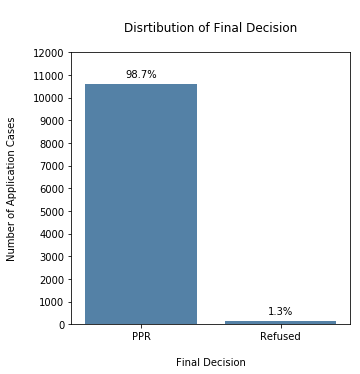

In [2497]:
# application cases by final decisions

all_cases = len(complete_cases)
ppr_cases = len(complete_cases.query('final_decision == "PPR"'))
ref_cases = len(complete_cases.query('final_decision == "Refused"'))

print('\nThere are {} complete application cases.\n'.format(all_cases))
print('{} ({:0.1f}%) of them were approved.'.format(ppr_cases, 100 * ppr_cases / all_cases))  
print('Only {} ({:0.1f}%) of them were refused.'.format(ref_cases, 100 * ref_cases / all_cases))

plt.figure(figsize = [5, 5])
y_ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]

sb.countplot(data = complete_cases, x = 'final_decision', color = 'steelblue')

categories = complete_cases['final_decision'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(complete_cases))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')
    
plt.title('\nDisrtibution of Final Decision\n')
plt.xlabel('\nFinal Decision')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.show();


2325 (21.6%) cases had additional documents request.
8437 (78.4%) cases did not have additional documents request


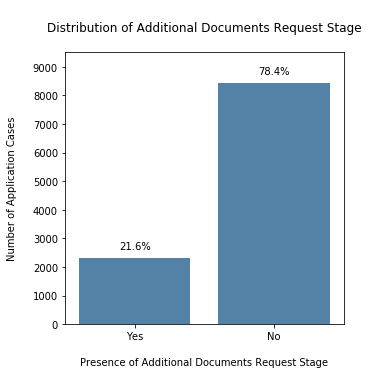

In [2498]:
# distribution of additional documents request stage

ad_cases = len(complete_cases.query('add_docs_request == "Yes"'))
no_ad_cases = len(complete_cases.query('add_docs_request == "No"'))

print('\n{} ({:0.1f}%) cases had additional documents request.'.format(ad_cases, 100 * ad_cases/all_cases))  
print('{} ({:0.1f}%) cases did not have additional documents request'.format(no_ad_cases, 100*no_ad_cases/all_cases))

plt.figure(figsize = [5, 5])
y_ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
ad_order = complete_cases['add_docs_request'].value_counts(ascending = True).index
sb.countplot(data = complete_cases, x = 'add_docs_request', color = 'steelblue', order = ad_order)

categories = complete_cases['add_docs_request'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(complete_cases))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')
    
plt.title('\nDistribution of Additional Documents Request Stage\n')
plt.xlabel('\nPresence of Additional Documents Request Stage')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.ylim(0,9500)
plt.show();


202 (1.9%) cases had security screening.
10560 (98.1%) cases did not have security screening


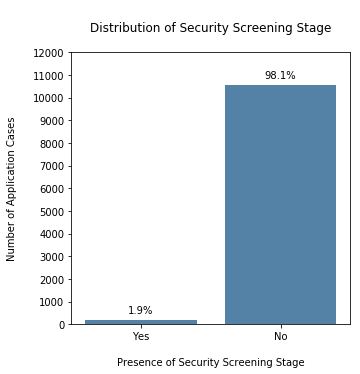

In [2499]:
# distribution of security screening stage
ss_cases = len(complete_cases.query('security_screening == "Yes"'))
no_ss_cases = len(complete_cases.query('security_screening == "No"'))

print('\n{} ({:0.1f}%) cases had security screening.'.format(ss_cases, 100 * ss_cases / all_cases))  
print('{} ({:0.1f}%) cases did not have security screening'.format(no_ss_cases, 100 * no_ss_cases / all_cases))

plt.figure(figsize = [5, 5])
y_ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]
ss_order = complete_cases['security_screening'].value_counts(ascending = True).index
sb.countplot(data = complete_cases, x = 'security_screening', color = 'steelblue', order = ss_order)

categories = complete_cases['security_screening'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(complete_cases))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')
    
plt.title('\nDistribution of Security Screening Stage\n')
plt.xlabel('\nPresence of Security Screening Stage')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.show();

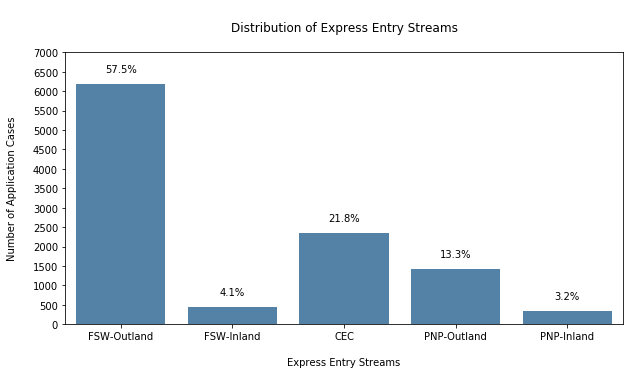

In [2500]:
# distribution of streams 
plt.figure(figsize = [10, 5])
y_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000]
stream_order = ['FSW-Outland', 'FSW-Inland', 'CEC', 'PNP-Outland', 'PNP-Inland']
sb.countplot(data = complete_cases, x = 'stream', color = 'steelblue', order = stream_order)

categories = complete_cases['stream'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(complete_cases))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Express Entry Streams\n')
plt.xlabel('\nExpress Entry Streams')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.show();

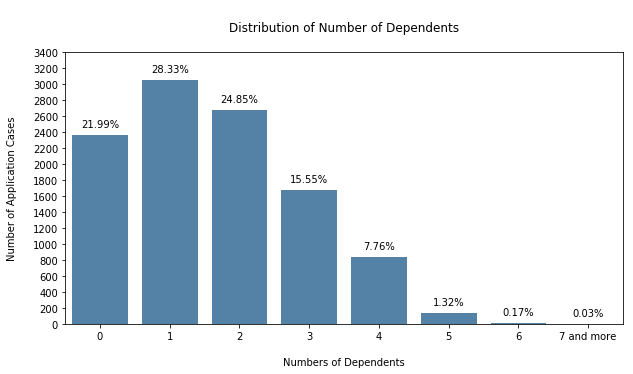

In [2501]:
# distribution of number of dependents
plt.figure(figsize = [10, 5])
y_ticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400]

sb.countplot(data = complete_cases, x = 'dependents', color = 'steelblue')

categories = complete_cases['dependents'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.2f}%'.format(100 * categories[label.get_text()] / len(complete_cases))
    plt.text(loc, categories[label.get_text()] + 100, percentage, ha = 'center', va = 'baseline')


plt.title('\nDistribution of Number of Dependents\n')
plt.xlabel('\nNumbers of Dependents')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.show();

Since there are more than 140 countries of nationality and residence and most of them are represented by a small number of applications I have adjusted the original data and combined countries represented by less than 50 applciations in one value *Other*.

In [2502]:
# create a new dataframe with countries of nationality and their number of applications
countries_nationality = complete_cases.groupby([
    'nationality']).size().reset_index().rename(columns = {0: 'case_count_n'}).sort_values(by = [
    'case_count_n'], ascending = False).reset_index(drop = True)

# cut countries which represented less than in 50 applications 
popular_countries_n = countries_nationality[countries_nationality.case_count_n >= 50]

# counts the number of applications for countries which represented less than in 50 applications
other_countries_n = pd.DataFrame([[
    'Other', countries_nationality[countries_nationality.case_count_n < 50].sum(axis = 0)[
        'case_count_n']]], columns = ['nationality_n','case_count_n'])


# create copy of complete_cases dataframe and replace names of countries represented less than in 50 applications 
# with Other
countries_cases_n = complete_cases.copy()

for index, row in countries_cases_n.iterrows():
    if row.nationality in popular_countries_n.nationality.tolist():
        pass
    else:
        countries_cases_n.loc[index, 'nationality'] = 'Other'

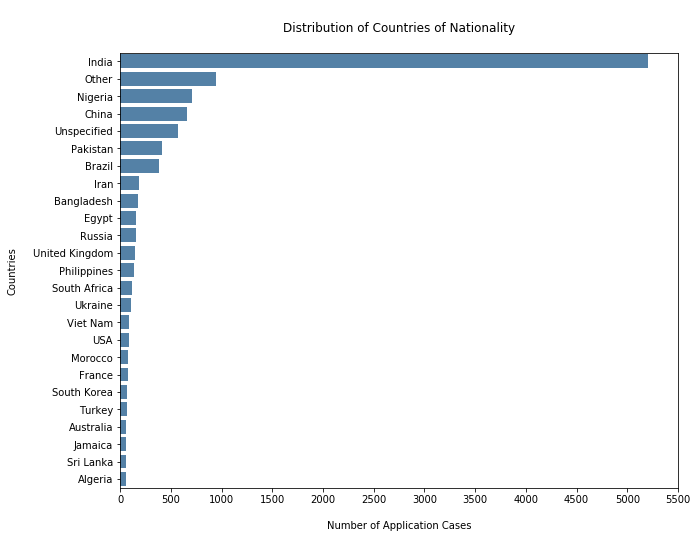

In [2503]:
# distribution of the countries of nationality
plt.figure(figsize = [10, 8])
x_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

nationality_order = countries_cases_n.nationality.value_counts().index
sb.countplot(data = countries_cases_n, y = 'nationality', color = 'steelblue', order = nationality_order)
plt.title('\nDistribution of Countries of Nationality\n')
plt.xlabel('\nNumber of Application Cases\n')
plt.ylabel('Countries\n')
plt.xticks(x_ticks)
plt.show();

It seems like applicants with Indian citizenship were a vast majority of the finalised cases. Let's check it in other way "zooming out" the set of countries.

In [2504]:
# create dataframe with only three values of the nationalitiy column: India, Other and Unspecified
nationalities = complete_cases[['nationality', 'processing_days']].copy()

for index, row in nationalities.iterrows():
    if row.nationality == 'Unspecified' or row.nationality == 'India':
        pass
    else:
        nationalities.loc[index, 'nationality'] = 'Other'
        
# check the result 
nationalities.nationality.value_counts()

India          5202
Other          4990
Unspecified     570
Name: nationality, dtype: int64

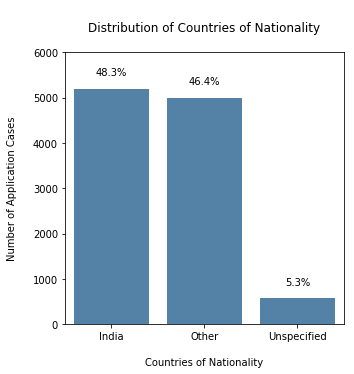

In [2505]:
# distribution of the countries of nationality
plt.figure(figsize = [5, 5])
y_ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000]

nationalities_order = ['India', 'Other', 'Unspecified']
sb.countplot(data = nationalities, x = 'nationality', color = 'steelblue', order = nationalities_order)

categories = nationalities['nationality'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(nationalities))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')
    
plt.title('\nDistribution of Countries of Nationality\n')
plt.xlabel('\nCountries of Nationality')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.ylim(0,6000)
plt.show();

The second visualization reveals that even if Indians were the most group of applicants the amount of their cases is not so huge as it seems on the first plot.

In [2506]:
# create a new dataframe with countries of residence and their number of applications
countries_residence = complete_cases.groupby([
    'residence']).size().reset_index().rename(columns = {0: 'case_count_r'}).sort_values(by = [
    'case_count_r'], ascending = False).reset_index(drop = True)

# cut countries which represented less than in 50 applications 
popular_countries_r = countries_residence[countries_residence.case_count_r >= 50]

# counts the number of applications for countries which represented less than in 50 applications
other_countries_r = pd.DataFrame([[
    'Other', countries_residence[countries_residence.case_count_r < 50].sum(axis = 0)[
        'case_count_r']]], columns = ['residence_r','case_count_r'])


# create copy of complete_cases dataframe and replace names of countries represented less than in 50 applications 
# with Other
countries_cases_r = complete_cases.copy()

for index, row in countries_cases_r.iterrows():
    if row.residence in popular_countries_r.residence.tolist():
        pass
    else:
        countries_cases_r.loc[index, 'residence'] = 'Other'

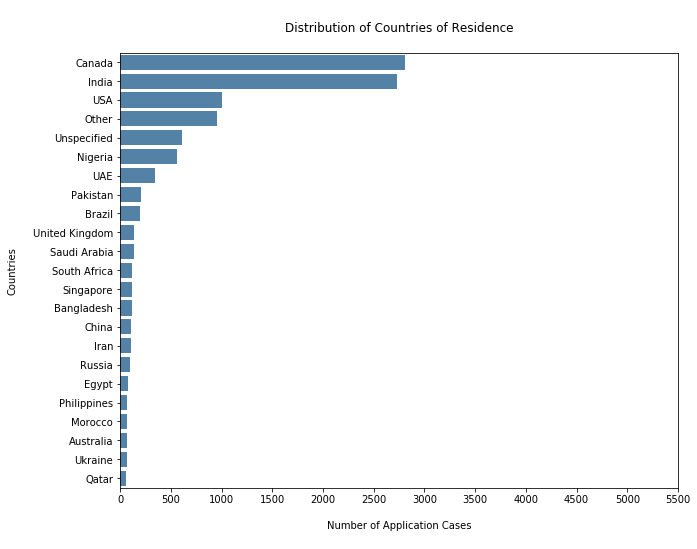

In [2507]:
# distribution of countries of residence
plt.figure(figsize = [10, 8])
x_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

residence_order = countries_cases_r.residence.value_counts().index
sb.countplot(data = countries_cases_r, y = 'residence', color = 'steelblue', order = residence_order)
plt.title('\nDistribution of Countries of Residence\n')
plt.xlabel('\nNumber of Application Cases\n')
plt.ylabel('Countries\n')
plt.xticks(x_ticks)
plt.show();

It would be also interesting to look at the distribution of cases by two critetia: if the case was applied from inside Canada or outside.

In [2508]:
# create dataframe with only three values of the residence column: Canada, Other and Unspecified
residences = complete_cases.copy()

for index, row in residences.iterrows():
    if row.residence == 'Unspecified' or row.residence == 'Canada':
        pass
    else:
        residences.loc[index, 'residence'] = 'Other'
        
# check the result 
residences.residence.value_counts()

Other          7350
Canada         2805
Unspecified     607
Name: residence, dtype: int64

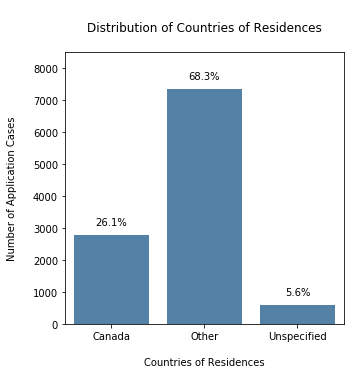

In [2509]:
# distribution of the countries of residence
plt.figure(figsize = [5, 5])
y_ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]

residences_order = ['Canada', 'Other', 'Unspecified']
sb.countplot(data = residences, x = 'residence', color = 'steelblue', order = residences_order)

categories = residences['residence'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(residences))
    plt.text(loc, categories[label.get_text()] + 300, percentage, ha = 'center', va = 'baseline')
    
plt.title('\nDistribution of Countries of Residences\n')
plt.xlabel('\nCountries of Residences')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.ylim(0,8500)
plt.show();

As I found out before there 7.3% applicant who definitely applied from inside Canada (FSW-Inland and PNP-Inland streams). Typically, people who apply for CEC stream live in Canada as well so I can add 21.8% CEC-applicants to 7.3%. It means 29.1% applicants could apply for immigration from inside Canada.  

However, I see 26.1% on the plot above. This difference can be explained by the facts that some of CEC-applicants could apply from the other countries or just could not specify their residences in the dataset. 

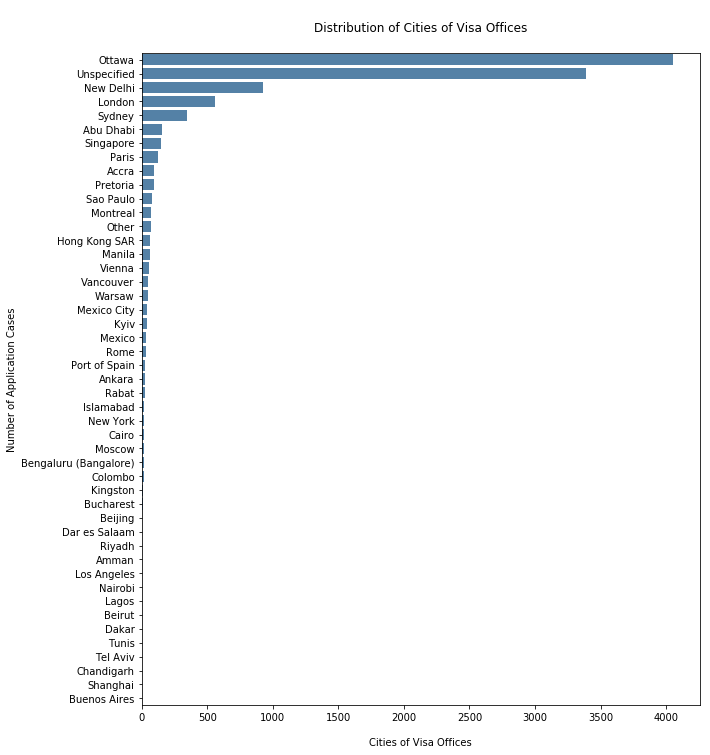

In [2510]:
# distribution of the cities of visa offices
plt.figure(figsize = [10, 12])
x_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

visa_office_order = complete_cases.visa_office.value_counts().index
sb.countplot(data = complete_cases, y = 'visa_office', color = 'steelblue', order = visa_office_order)
plt.title('\nDistribution of Cities of Visa Offices\n')
plt.xlabel('\nCities of Visa Offices')
plt.ylabel('Number of Application Cases')
#plt.xticks(x_ticks)
plt.show();

Besides other it would be interesting to combine the offices inside and outside Canada and then examine the distribution. 

In [2516]:
# create dataframe with only three values of the visa_office column: Canada, Other and Unspecified
visa_office_countries = complete_cases[['visa_office', 'processing_days']].copy()
visa_office_index_to_delete = []
for index, row in visa_office_countries.iterrows():
    if row.visa_office in ['Ottawa', 'Sydney', 'Montreal', 'Vancouver']:
        visa_office_countries.loc[index, 'visa_office'] = 'In Canada'
    elif row.visa_office == 'Unspecified':
        pass
    else:
        visa_office_countries.loc[index, 'visa_office'] = 'Not in Canada'

# check the result 
visa_office_countries.visa_office.value_counts()

In Canada        4522
Unspecified      3386
Not in Canada    2854
Name: visa_office, dtype: int64

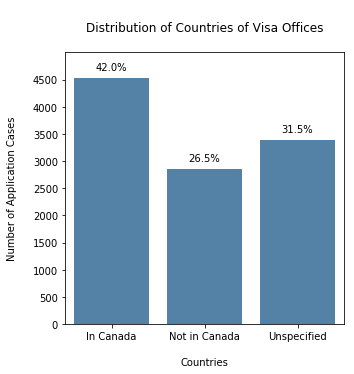

In [2517]:
# distribution of the countries of visa offices
plt.figure(figsize = [5, 5])
y_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

visa_office_order = ['In Canada', 'Not in Canada', 'Unspecified']
sb.countplot(data = visa_office_countries, x = 'visa_office', color = 'steelblue', order = visa_office_order)

categories = visa_office_countries['visa_office'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    percentage = '{:0.1f}%'.format(100 * categories[label.get_text()] / len(visa_office_countries))
    plt.text(loc, categories[label.get_text()] + 150, percentage, ha = 'center', va = 'baseline')
    
plt.title('\nDistribution of Countries of Visa Offices\n')
plt.xlabel('\nCountries')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.ylim(0,5000)
plt.show();

### Observation 1:

- almost all complete applications were approved and only 1.3% were refused;
- 21.6% of all complete applications had an additional documents request processing stage.
- almost all complete applications (98.1%) did not have a security screening processing stage and only 1.9% had.
- more than 60% of applicants applied for FSW stream outland and inland, 28.1% - for CEC stream and only 16.5% had provincial nominations;
- the most applicants (75.2%) were single or did not have a big family (only a spouse or a spouse and one child);
- almost half of applicants (48.3%) had Indian citizenship; 
- 26% future immigrants applied for immigration programs from inside Canada;
- 31.5% of applicants did not have information about their visa office;
- 42% of the application cases with a specified visa office were processed in Canada, particularly in Ottawa.

<a id='univariate_exploration_2'></a>
### Part 2

As the important idea of this analysis to explore the length of the application processing time and its relation with application features let's start by looking at the distribution of the processing time in days for all complete cases.

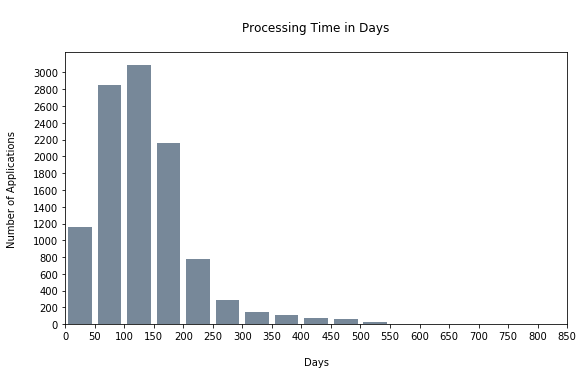

In [2518]:
# distribution of processing time in days
bin_edges = np.arange(0, complete_cases.processing_days.max() + 25, 50) 

x_ticks = np.arange(0, complete_cases.processing_days.max() + 50, 50)
y_ticks = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000] 

plt.figure(figsize = [9, 5])
plt.hist(data = complete_cases, x = 'processing_days', bins = bin_edges, rwidth = 0.8, color = 'lightslategray')
plt.title('\nProcessing Time in Days\n')
plt.xlabel('\nDays')
plt.ylabel('Number of Applications\n')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlim(0, 850)
plt.show()

### Observation 2:

Proсessing time from 2015 to the current time has a right skewed distribution with a long tail which means that the most of application cases were finalised in relatively short time, and only few of them were processing much longer.

Some basic statisics were calculated below.

In [2519]:
# some basic statistics for processing time in days
print('- maximum processing time in days for all complete cases: {} days.'.format(complete_cases.processing_days.max()))
print('- minimum processing time in days for all complete cases: {} days.'.format(complete_cases.processing_days.min()))
print('- average processing time in days for all complete cases: {:0.0f} days.'.format(complete_cases.processing_days.mean()))
print('- 25% application cases were finalised in {:0.0f} days.'.format(complete_cases.processing_days.describe()[4]))
print('- 50% application cases were finalised in {:0.0f} days.'.format(complete_cases.processing_days.describe()[5]))
print('- 75% application cases were finalised in {:0.0f} days.'.format(complete_cases.processing_days.describe()[6]))

- maximum processing time in days for all complete cases: 817 days.
- minimum processing time in days for all complete cases: 7 days.
- average processing time in days for all complete cases: 133 days.
- 25% application cases were finalised in 78 days.
- 50% application cases were finalised in 120 days.
- 75% application cases were finalised in 169 days.


<a id='univariate_exploration_3'></a>
### Part 3

To better understand the data I would like to explore changes of numbers of finalised cases over the time.

Firsty, I will make a chart representing quantities of application cases finalised per each year.

In [2520]:
# create a new dataframe 
cases_full_date = complete_cases.copy()

# split date values into a year, a month and a day in final_decision_date colunm
# and create three new columns with these values
cases_full_date['final_decision_day'] = cases_full_date['final_decision_date'].dt.day
cases_full_date['final_decision_month'] = cases_full_date['final_decision_date'].dt.month
cases_full_date['final_decision_year'] = cases_full_date['final_decision_date'].dt.year

cases_full_date['final_decision_month'] = cases_full_date[
    'final_decision_month'].apply(lambda x: calendar.month_abbr[x])


cases_full_date = cases_full_date[['case', 'aor_date', 'stream', 'current_status', 'dependents', 'province', 
                                  'nationality', 'residence', 'visa_office', 'med_passed_date', 'add_docs_request', 
                                  'add_docs_request_date', 'rprf_paid_date', 'security_screening', 'ss_start_date', 
                                  'final_decision_date', 'final_decision_year', 'final_decision_month', 
                                  'final_decision_day', 'final_decision', 'processing_days', 'state']]

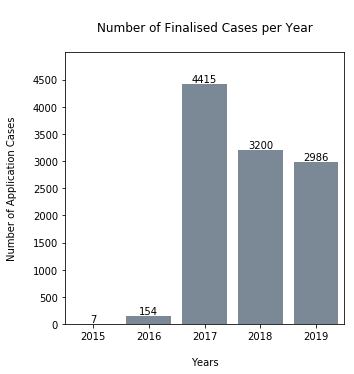

In [2521]:
# numbers of finalised cases per year
fig, ax1 = plt.subplots(figsize = [5, 5])
y_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]

cases_years = sb.countplot(ax = ax1, data = cases_full_date, x = 'final_decision_year', color = 'lightslategray')

cases_years.set_xticklabels(cases_years.get_xticklabels())
for p in cases_years.patches:
    height = p.get_height()
    cases_years.text(p.get_x() + p.get_width() / 2, height + 0.1, height, ha = 'center', va = 'bottom')
    
plt.title('\nNumber of Finalised Cases per Year\n')
plt.xlabel('\nYears')
plt.ylabel('Number of Application Cases\n')
plt.yticks(y_ticks)
plt.ylim(0, 5000)
plt.show();

The next chart will represent the numbers of finalised cases per months in each given year.

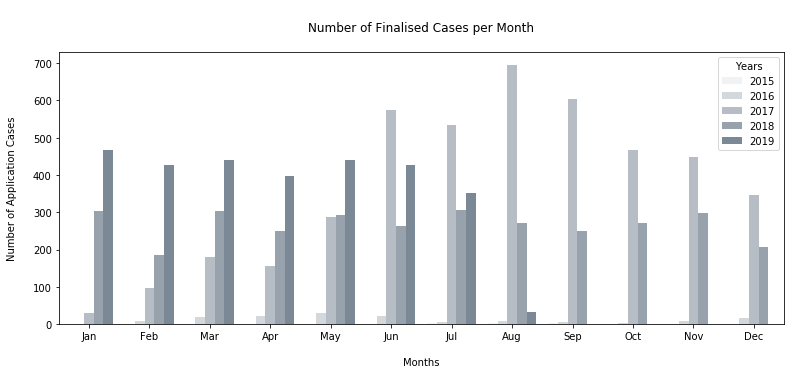

In [2522]:
# numbers of finalised cases per months in each year
fig, ax1 = plt.subplots(figsize = [13, 5])
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years_order = [2015, 2016, 2017, 2018, 2019]

# cases_months = 
cases_months = sb.countplot(data = cases_full_date, x = 'final_decision_month', hue = 
             'final_decision_year', order = months_order, hue_order = years_order, color = 'lightslategray')
    
plt.title('\nNumber of Finalised Cases per Month\n')
plt.xlabel('\nMonths')
plt.ylabel('Number of Application Cases\n')
cases_months.get_legend().set_title('Years')
plt.show();

### Observation 3:

Express Entry system started to function in 2015 so there are extremely small number of cases finalised that year in the dataset. 

The number of finalised cases in 2019 is incomplete since the year is not over yet but even now it is almost equal the number of the cases finalised in 2018. 

As for the number of finalised cases per month in each year there are no clear patterns or trends as we can see on the last chart.

_______

#### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

There were no surprises during the exploratory and visualization phases since I made a lot of efforts to assess and clean original data and sort out all unusual points. Processing time has some outliers but it is the real timing that can be explained by the complexity of the cases or by presence optional processing stages and I will try to figure it out in the following part of this exploratory analysis.

    
#### Of the features you investigated, were there any unusual distributions? 

Almost all case features had expected distributions. What caught my attention is distribution the countries of residence since I did not expect that the fourth part of future immigrants have applied for economic immigration programs from inside Canada which means they already lived in the country as students or workers.

   
#### Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There are more than 140 countries of nationality and residence in the dataset and most of them are represented by a small number of applications so I have adjusted the original data and combined countries represented by less than 50 applciations in one value *Other* before visualizing the data.

I also decided to "zoom out" both sets of countries (of nationality and residence) and divided them into three groups (India, Other and Unspecified for nationality and Canada, Other and Unspecified for residence) to compare India and Canada with the groups of the other countries.

I did the same adjustment for better understading distribution of visa offices. Since in the dataset visa offices represented by cities I combined Canadian cities (Ottawa, Sydney, Monteal and Vancouver) into a value 'In Canada' and other cities - 'Not in Canada'. The third group named Unspecified is for cases where applicants did not know their visa offices.

To understand how many cases were finalised each year and on average per month I splitted values of *final_decision_date* variable into year, month and days and added new columns with these new variables to the dataset.

<a id='bivariate_exploration'></a>
## Bivariate Exploration

Since I am interested in finding out what can affect application processing time, I would like to look at the pairwise relationships between application case features and the number of days has been taken to process the case.

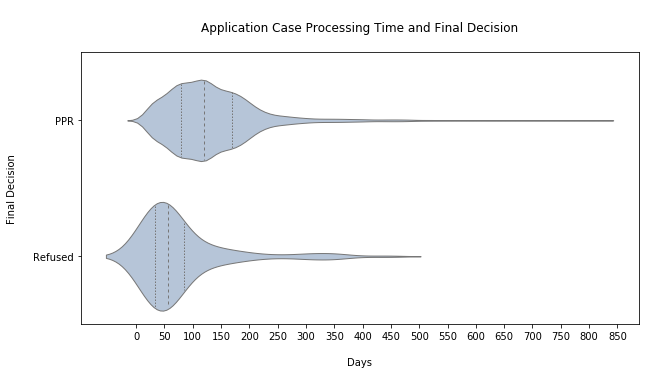

In [2523]:
# processing time in days for approved and refused applications
plt.figure(figsize = [10, 5])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
sb.violinplot(data = complete_cases, x = 
              'processing_days', y = 'final_decision', color = 'lightsteelblue', inner = 'quartile', linewidth = 1)



plt.title('\nApplication Case Processing Time and Final Decision\n')
plt.xlabel('\nDays')
plt.ylabel('Final Decision\n')
plt.xticks(x_ticks)
plt.show();

### Observation 1:

The graph clearly shows that on average refused cases are finalised faster. The reason for this is that most cases get refuse due to the incompletnes of the documents in the begining of processing. The small part of applications gets refuse much later at other stages of case processing.

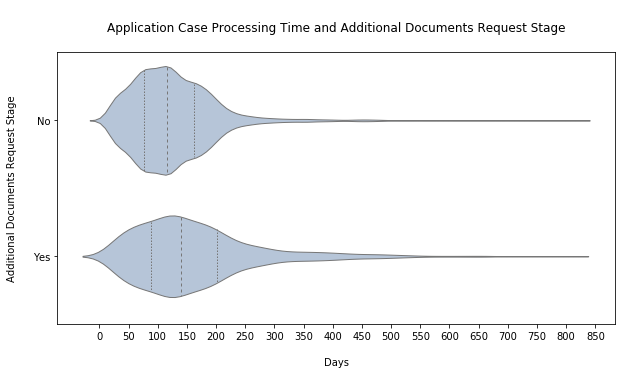

In [2524]:
# processing time in days for application with and without additional documents request stage
plt.figure(figsize = [10, 5])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
sb.violinplot(data = complete_cases, x = 
              'processing_days', y = 'add_docs_request', color = 'lightsteelblue', inner = 
              'quartile', linewidth = 1)

plt.title('\nApplication Case Processing Time and Additional Documents Request Stage\n')
plt.xlabel('\nDays')
plt.ylabel('Additional Documents Request Stage\n')
plt.xticks(x_ticks)
plt.show();

### Observation 2:

Processing time of cases with additional documents request is slightly longer than without. To prepare additional documents and send them to immigration service on average take about 1-2 weeks and then officers spend some time to process these documents. However, as we can see from the chart for some cases this delay can be much longer.

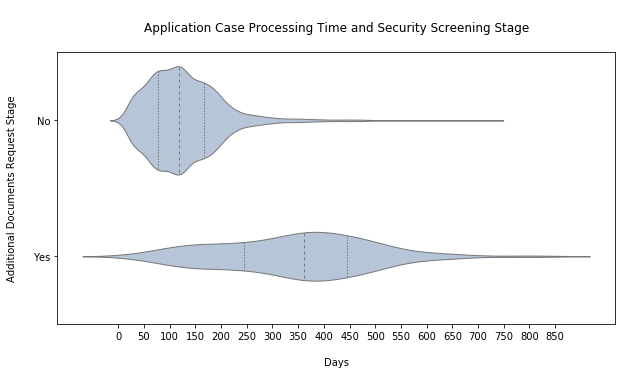

In [2525]:
# processing time in days for application with and without security screening stage
plt.figure(figsize = [10, 5])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]

sb.violinplot(data = complete_cases, x = 
              'processing_days', y = 'security_screening', color = 'lightsteelblue',  linewidth = 1, inner = 
              'quartile')

plt.title('\nApplication Case Processing Time and Security Screening Stage\n')
plt.xlabel('\nDays')
plt.ylabel('Additional Documents Request Stage\n')
plt.xticks(x_ticks)
plt.show();

### Observation 3:

As we can see from the plot the presence of security screening stage affects processing time significantly.

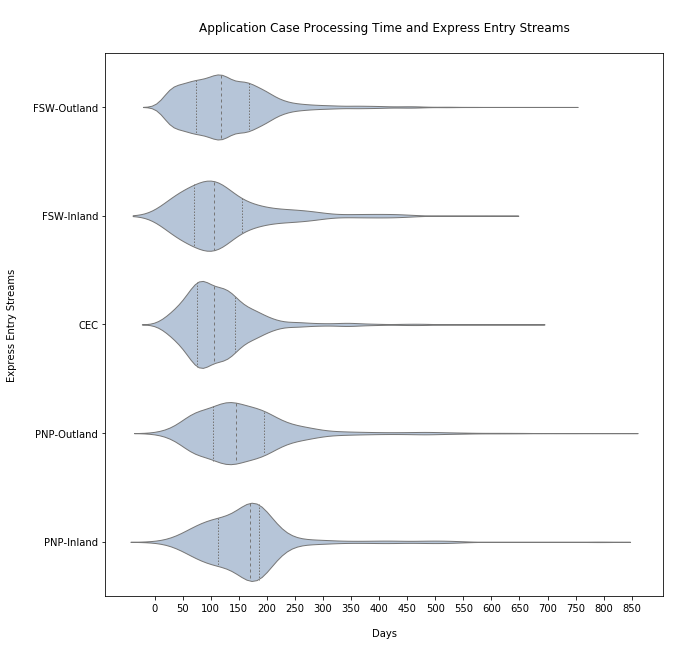

In [2526]:
# processing time in days for application with and without security screening stage
plt.figure(figsize = [10, 10])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
stream_order = ['FSW-Outland', 'FSW-Inland', 'CEC', 'PNP-Outland', 'PNP-Inland']

sb.violinplot(data = complete_cases, x = 
              'processing_days', y = 'stream', color = 
              'lightsteelblue',  linewidth = 1, order = stream_order, inner = 'quartile')

plt.title('\nApplication Case Processing Time and Express Entry Streams\n')
plt.xlabel('\nDays')
plt.ylabel('Express Entry Streams\n')
plt.xticks(x_ticks)
plt.show();

### Observation 4:

Processing time is not much different for FSW and CEC streams while PNP applications were processed longer.

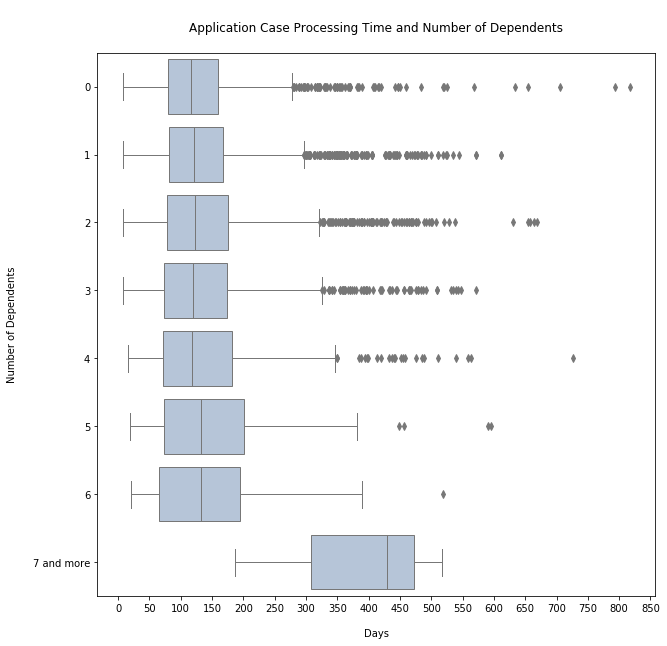

In [2527]:
# processing time in days for application with different numbers of dependents
plt.figure(figsize = [10, 10])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
dependants_order = ['0', '1', '2', '3', '4', '5', '6', '7 and more']

sb.boxplot(data = complete_cases, x = 
           'processing_days', y = 'dependents', color = 
           'lightsteelblue',  linewidth = 1, order = dependants_order)

plt.title('\nApplication Case Processing Time and Number of Dependents\n')
plt.xlabel('\nDays')
plt.ylabel('Number of Dependents\n')
plt.xticks(x_ticks)
plt.show();

### Observation 5:

The chart above shows that the number of dependents does not affects processing time except for really big families. However, there are only 0,03% applicants in the dataset who have 7 and more dependents so let's check processing time and other features for each family.

In [2528]:
# get cases of applicants who have 7 and more dependents
complete_cases.query('dependents == "7 and more"')

,case,aor_date,stream,current_status,dependents,province,nationality,residence,visa_office,med_passed_date,add_docs_request,add_docs_request_date,rprf_paid_date,security_screening,ss_start_date,final_decision_date,final_decision,processing_days,state
3559,47732,2018-06-03,FSW-Outland,PPR,7 and more,None,Nigeria,Nigeria,Kyiv,2018-06-15,No,None,2018-06-03,No,None,2018-12-07,PPR,187,Active
5847,32629,2017-10-08,PNP-Outland,PPR,7 and more,Ontario,"Palestine, State of",Kuwait,London,2017-11-23,No,None,2017-10-08,Yes,2018-04-23,2018-12-11,PPR,429,Active
6071,30181,2017-09-19,PNP-Outland,PPR,7 and more,Ontario,Nigeria,Nigeria,London,2017-10-17,Yes,2019-01-18,2017-09-19,No,None,2019-02-18,PPR,517,Active


As we can see from the data one case has reasonable processing time and two of them were processed much longer. They also had optional processing stage which definitey extends processing time (*Observations 1 and 2*) and applied for PNP-Outland stream which also has the longest processing time of all the streams (*Observation 3*). All these facts and a small number of these cases allows me consider them outliers.

To explore processing time for countries of nationality and residence I will adjust the original data and combined countries represented by less than 10 applciations in one value Other before visualizing the data.

In [2545]:
# create a new dataframe with countries of nationality and their number of applications
countries_nationality_pt = complete_cases.groupby([
    'nationality']).size().reset_index().rename(columns = {0: 'case_count_n_pt'}).sort_values(by = [
    'case_count_n_pt'], ascending = False).reset_index(drop = True)

# cut countries which represented less than in 10 applications 
popular_countries_n_pt = countries_nationality_pt[countries_nationality_pt.case_count_n_pt >= 10]

# counts the number of applications for countries which represented less than in 10 applications
other_countries_n_pt = pd.DataFrame([[
    'Other', countries_nationality_pt[countries_nationality_pt.case_count_n_pt < 10].sum(axis = 0)[
        'case_count_n_pt']]], columns = ['nationality_n_pt','case_count_n_pt'])


# create copy of complete_cases dataframe and replace names of countries represented less than in 50 applications 
# with Other
countries_cases_n_pt = complete_cases.copy()

for index, row in countries_cases_n_pt.iterrows():
    if row.nationality in popular_countries_n_pt.nationality.tolist():
        pass
    else:
        countries_cases_n_pt.loc[index, 'nationality'] = 'Other'

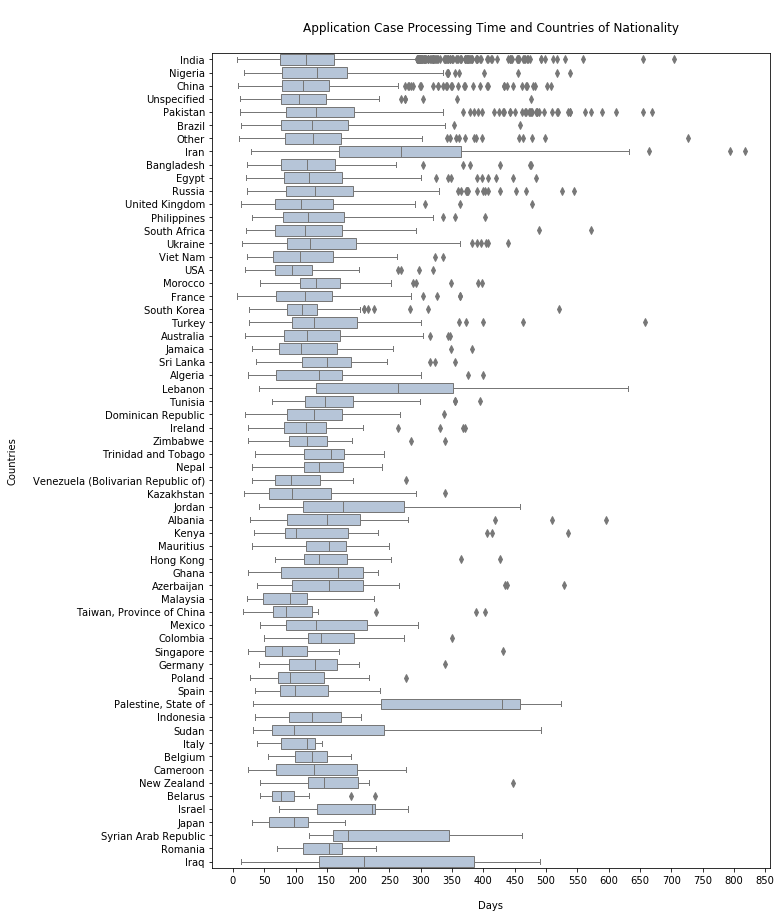

In [2546]:
# processing time in days for applicants from different countries of nationality
plt.figure(figsize = [10, 15])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
nationality_order = countries_cases_n_pt.nationality.value_counts().index

sb.boxplot(data = countries_cases_n_pt, x = 
           'processing_days', y = 'nationality', color = 
           'lightsteelblue',  linewidth = 1, order = nationality_order)

plt.title('\nApplication Case Processing Time and Countries of Nationality\n')
plt.xlabel('\nDays')
plt.ylabel('Countries\n')
plt.xticks(x_ticks)
plt.show();

In [2547]:
# create a new dataframe with countries of nationality and their number of applications
countries_residence_pt = complete_cases.groupby([
    'residence']).size().reset_index().rename(columns = {0: 'case_count_r_pt'}).sort_values(by = [
    'case_count_r_pt'], ascending = False).reset_index(drop = True)

# cut countries which represented less than in 10 applications 
popular_countries_r_pt = countries_residence_pt[countries_residence_pt.case_count_r_pt >= 10]

# counts the number of applications for countries which represented less than in 10 applications
other_countries_r_pt = pd.DataFrame([[
    'Other', countries_residence_pt[countries_residence_pt.case_count_r_pt < 10].sum(axis = 0)[
        'case_count_r_pt']]], columns = ['residence_r_pt','case_count_r_pt'])


# create copy of complete_cases dataframe and replace names of countries represented less than in 50 applications 
# with Other
countries_cases_r_pt = complete_cases.copy()

for index, row in countries_cases_r_pt.iterrows():
    if row.residence in popular_countries_r_pt.residence.tolist():
        pass
    else:
        countries_cases_r_pt.loc[index, 'residence'] = 'Other'

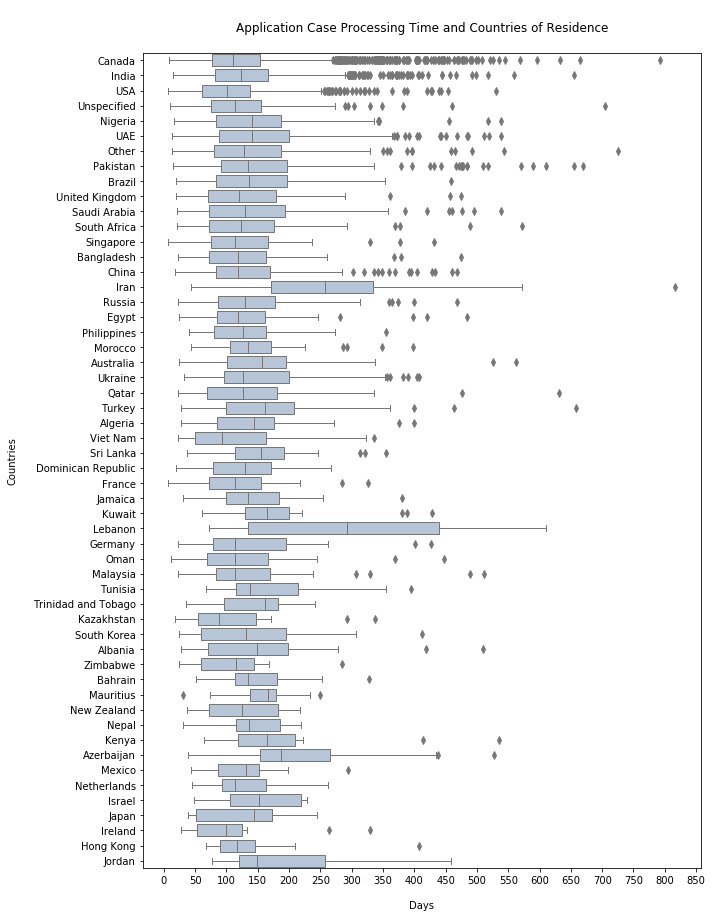

In [2548]:
# processing time in days for for applicants from different countries of residence
plt.figure(figsize = [10, 15])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
residence_order = countries_cases_r_pt.residence.value_counts().index

sb.boxplot(data = countries_cases_r_pt, x = 
           'processing_days', y = 'residence', color = 'lightsteelblue',  linewidth = 1, order = residence_order)

plt.title('\nApplication Case Processing Time and Countries of Residence\n')
plt.xlabel('\nDays')
plt.ylabel('Countries\n')
plt.xticks(x_ticks)
plt.show();

### Observation 6:

Two plots above revealed that the citizenship and the residence in some Middle East countries like Iran, Iraq, Lebanon, Palestine, Syrian Arabic Republic, Jordan, Libya had a great impact on the extending of processing time.

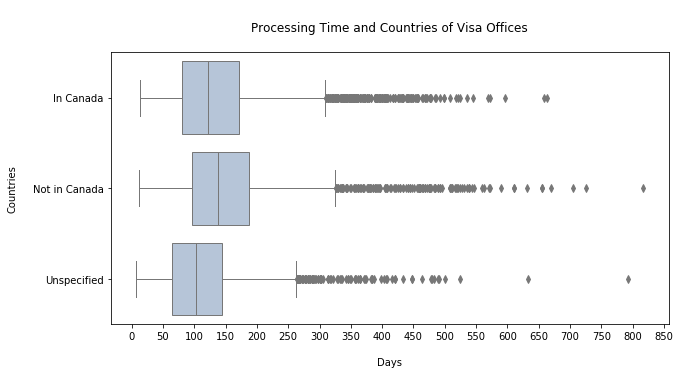

In [2549]:
# processing time in days for three groups of values of the visa_office column
plt.figure(figsize = [10, 5])
x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]

visa_office_order = ['In Canada', 'Not in Canada', 'Unspecified']
sb.boxplot(data = visa_office_countries, x = 
           'processing_days', y = 'visa_office', color = 
           'lightsteelblue',  linewidth = 1, order = visa_office_order)

plt.title('\nProcessing Time and Countries of Visa Offices\n')
plt.xlabel('\nDays')
plt.ylabel('Countries\n')
plt.xticks(x_ticks)
plt.show();

### Observation 7:

Although the graph indicates that processing time in Canadian visa offices slightly shorter I cannot make this conclusion since the number of cases with unspecified visa offices is rather large (*Univariate Exploration, Observation 1*) and can misrepresent the real situation.

As the important idea of this analysis to explore the length of the application processing time let's compare average processing time of finalised cases for every given year.

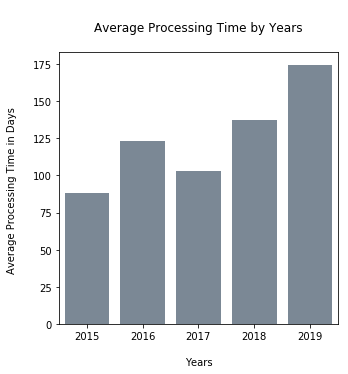

In [2550]:
# create plot for average processing time by years
plt.figure(figsize = [5, 5])

sb.barplot(data = cases_full_date.groupby([
    'final_decision_year']).mean().round(0).astype(int).reset_index(), x = 
           'final_decision_year', y = 'processing_days', color = 'lightslategray')

plt.title('\nAverage Processing Time by Years\n')
plt.xlabel('\nYears')
plt.ylabel('Average Processing Time in Days \n')
plt.show();

Next, I will plot the graph to compare distribution of processing time individually for each year.    
Since the numbers of cases finalised in 2015 were very small let's look only at data of 2016-2019. 

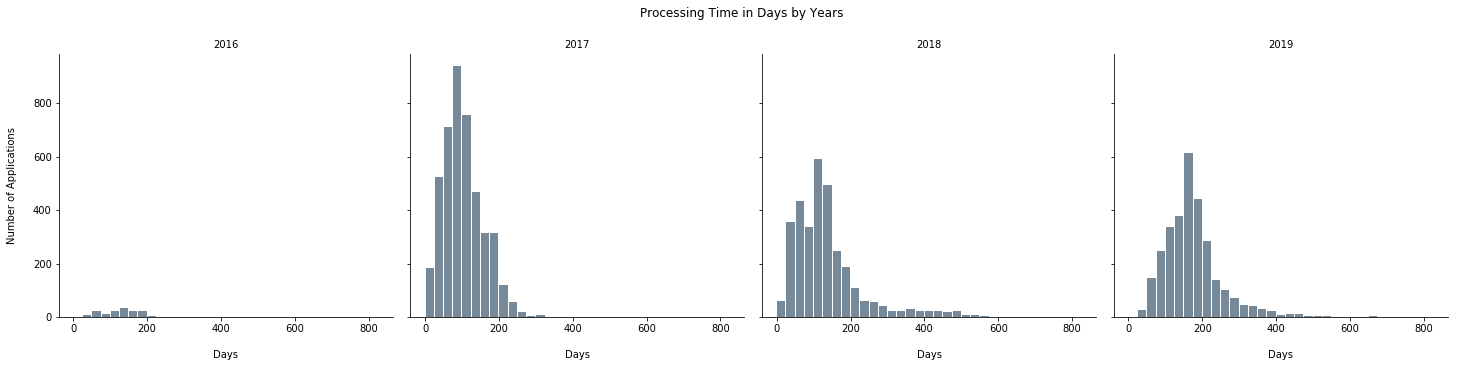

In [2585]:
# create a plot for distribution of processing time from year to year
bin_edges = np.arange(0, cases_full_date.processing_days.max() + 17.5, 25) 

x_ticks = np.arange(0, cases_full_date.processing_days.max() + 25, 25)

pt_by_years = sb.FacetGrid(data = cases_full_date.query('final_decision_year != 2015'), col = 
                           'final_decision_year', height = 5)
pt_by_years.map(plt.hist, 'processing_days', bins = bin_edges, rwidth = 0.89, color = 'lightslategrey')
pt_by_years.set_titles('{col_name}')

plt.subplots_adjust(top = 0.85)
pt_by_years.fig.suptitle('Processing Time in Days by Years')

pt_by_years.axes[0,0].set_xlabel('\nDays')
pt_by_years.axes[0,1].set_xlabel('\nDays')
pt_by_years.axes[0,2].set_xlabel('\nDays')
pt_by_years.axes[0,3].set_xlabel('\nDays')

pt_by_years.axes[0,0].set_ylabel('Number of Applications\n')

plt.show()

### Observation 8: 

As we can see processing time of Express Entry immigration cases has increased over the past three years and each year the number of applications which have been processed within 180 days (the time limit announced by Canadian immigration authorities) is reduced.

___

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part of exploration I created bivariate plots to understand the relationship between processing time and application case features. I discovered the following:

- Most refused cases are processed faster than approved cases but small part of refused cases in contrast are proccesed longer. I am going to find out in the next part if the presence of the optional additional stage can be a reason for that since additional documents request stage and security screening stage extend the processing time as I figured out above.<br><br>    

- Neither streams nor the number of dependants do not affect processing time significantly though the PNP applications are processed a little bit longer than other.<br><br>    

- Citizenship or residence in some Middle East countries like Iran, Iraq, Lebanon, Palestine, Syria, Jordan definitely can extend the processing time.<br><br>

- Processing time has increased over the past three years and each year the number of applications which have been processed within 180 days is reduced.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Since I had no purpose to investigate relationships between case features I did not observe relationships between the any other features except for the main future of interest - processing time.

<a id='multivariate_exploration'></a>
## Multivariate Exploration

In this section I would like to explore the combinations of application case feautures which have the impact on the processing time as was discovered on the previous stages: final desicions, the presence of optional processing stages, the countries of citizenship and residence and Express Entry streams.

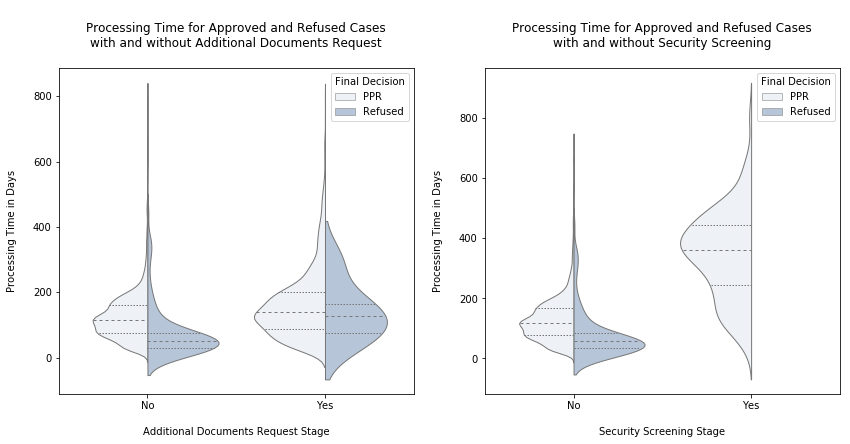

In [2552]:
# create two plot to analyze how the combinations of final decision and the presence of optional processing stages 
# can affect processing time
plt.figure(figsize = [14, 6])

# processing time for the combinations of final decision and additional documents request stage
plt.subplot(1, 2, 1)
ad_fin_dec = sb.violinplot(data = complete_cases, y = 'processing_days', x = 'add_docs_request', hue = 
              'final_decision', split = True, color = 'lightsteelblue',  linewidth = 1, order = [
                  'No', 'Yes'], inner = 'quartile')

plt.title(
    '\nProcessing Time for Approved and Refused Cases\nwith and without Additional Documents Request\n')

plt.ylabel('Processing Time in Days\n')
plt.xlabel('\nAdditional Documents Request Stage')
ad_fin_dec.get_legend().set_title('Final Decision')

# processing time for the combinations of final decision and security screening stage
plt.subplot(1, 2, 2)
ad_fin_dec = sb.violinplot(data = complete_cases, y = 'processing_days', x = 'security_screening', hue = 
              'final_decision', split = True, color = 'lightsteelblue',  linewidth = 1, order = [
                  'No', 'Yes'], inner = 'quartile')

plt.title('\nProcessing Time for Approved and Refused Cases\nwith and without Security Screening\n')

plt.ylabel('Processing Time in Days\n');
plt.xlabel('\nSecurity Screening Stage');
ad_fin_dec.get_legend().set_title('Final Decision')

plt.show()

### Observation 1:

The graphs above confirms some assumptions that I made in previous sections: processing time of the refused cases shorter than processing time of the approved cases if there were not any optional processing stages. 

As for processing time for cases with additional documents requests the refused cases were processed a little bit faster than the approved cases. Unfortunately, I cannot compare  the refused and approved cases with security screening stage because it is turned out there are not any refused cases with this processing stage in my dataset.

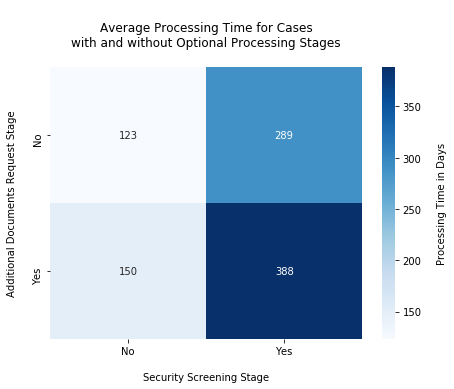

In [2553]:
# create heatmap to find out the average processing time for the combinations of optinal processing stages
plt.figure(figsize = [7, 5])

cat_means = complete_cases.groupby(['security_screening', 'add_docs_request']).mean()['processing_days']
cat_means = cat_means.reset_index(name = 'processing_days_avg')
cat_means = cat_means.pivot(index = 'add_docs_request', columns = 'security_screening', values = 
                            'processing_days_avg')

ad_ss = sb.heatmap(cat_means, annot = True, fmt = '.0f', cmap = 'Blues', cbar_kws = {'label' : 
                                                                                     '\nProcessing Time in Days'})

plt.title('\nAverage Processing Time for Cases\nwith and without Optional Processing Stages\n')
ad_ss.set_ylabel('Additional Documents Request Stage\n')
ad_ss.set_xlabel('\nSecurity Screening Stage')

plt.show()

### Observation 2:

As might be assumed the presence of both optional processing stages noticeably increases processing time. And the security screening stage without additional documents request extends processing time much more than the additional documents request stage without security screening.

In [2581]:
# divide all countries of nationality and residence into three groups: Other, Unspecified and Middle East for 
# Iran, Iraq, Lebanon, Palestine, Syrian Arabic Republic, Jordan, Libya
countries_group = complete_cases.copy()

for index, row in countries_group.iterrows():
    if row.nationality in ['Iran', 'Iraq', 'Lebanon', 'Palestine, State of', 'Syrian Arab Republic', 'Jordan', 
                           'Libya']:
        countries_group.loc[index, 'nationality'] = 'Middle East'
    elif row.nationality == 'Unspecified':
        pass
    else:
        countries_group.loc[index, 'nationality'] = 'Other'

for index, row in countries_group.iterrows():
    if row.residence in ['Iran', 'Iraq', 'Lebanon', 'Palestine, State of', 'Syrian Arab Republic', 'Jordan', 'Libya']:
        countries_group.loc[index, 'residence'] = 'Middle East'
    elif row.residence == 'Unspecified':
        pass
    else:
        countries_group.loc[index, 'residence'] = 'Other'

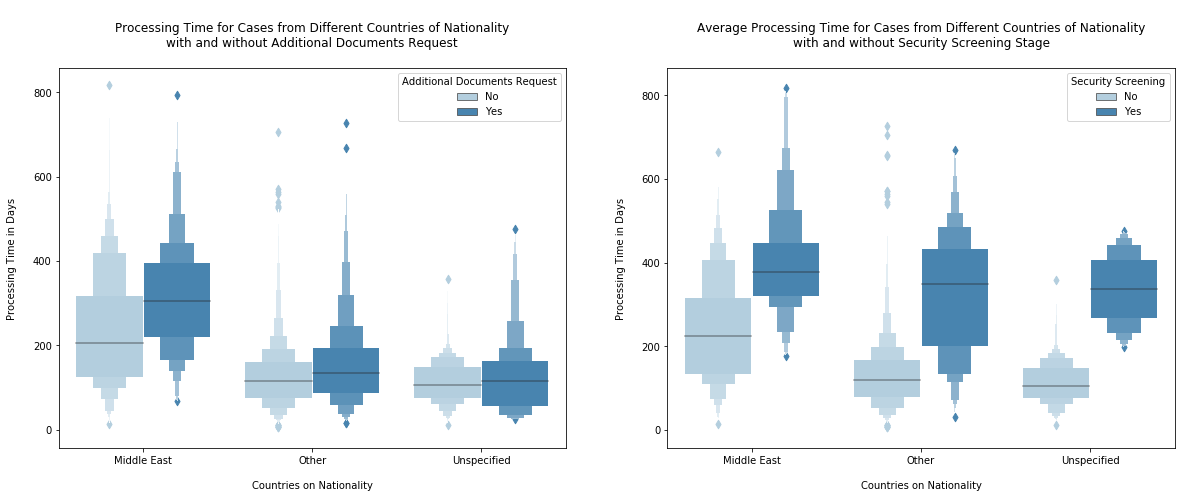

In [2582]:
# create two plot to analyze how the combinations of the countries of nationality and 
# the presence of optional processing stages can affect processing time
plt.figure(figsize = [20, 7])

# processing time for the combinations of countries of nationality and additional documents request stage
plt.subplot(1, 2, 1)
countries_n_ad = sb.boxenplot(data = countries_group, y = 'processing_days', x = 'nationality', hue = 
              'add_docs_request', palette = 'Blues',  order = ['Middle East', 'Other', 'Unspecified'])

plt.title(
    '\nProcessing Time for Cases from Different Countries of Nationality\nwith and without Additional Documents Request\n')


plt.ylabel('Processing Time in Days\n')
plt.xlabel('\nCountries on Nationality')
countries_n_ad.get_legend().set_title('Additional Documents Request')

# processing time for the combinations of countries of nationality and security screening stage
plt.subplot(1, 2, 2)
countries_n_ss = sb.boxenplot(data = countries_group, y = 'processing_days', x = 'nationality', hue = 
              'security_screening', palette = 'Blues',  order = ['Middle East','Other', 'Unspecified'])

plt.title(
    '\nAverage Processing Time for Cases from Different Countries of Nationality\nwith and without Security Screening Stage\n')

plt.ylabel('Processing Time in Days\n')
plt.xlabel('\nCountries on Nationality')
countries_n_ss.get_legend().set_title('Security Screening')


plt.show()

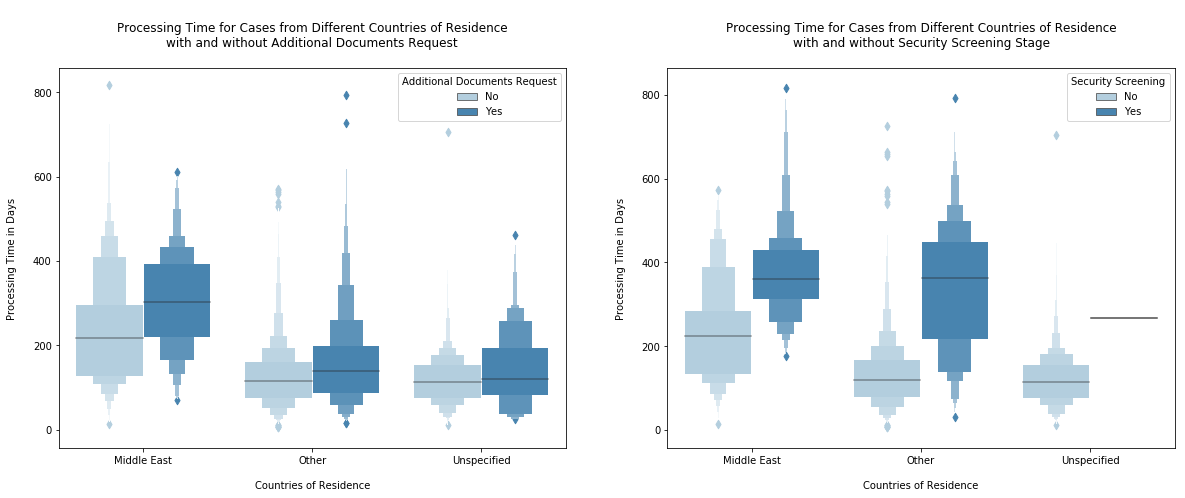

In [2583]:
# create two plot to analyze how the combinations of the countries of residence and 
# the presence of optional processing stages can affect processing time
plt.figure(figsize = [20, 7])

# processing time for the combinations of countries of residence and additional documents request stage
plt.subplot(1, 2, 1)
countries_r_ad = sb.boxenplot(data = countries_group, y = 'processing_days', x = 'residence', hue = 
              'add_docs_request', palette = 'Blues',  order = ['Middle East', 'Other', 'Unspecified'])

plt.title(
    '\nProcessing Time for Cases from Different Countries of Residence\nwith and without Additional Documents Request\n')


plt.ylabel('Processing Time in Days\n')
plt.xlabel('\nCountries of Residence')
countries_r_ad.get_legend().set_title('Additional Documents Request')

# processing time for the combinations of countries of residence and security screening stage
plt.subplot(1, 2, 2)
countries_r_ss = sb.boxenplot(data = countries_group, y = 'processing_days', x = 'residence', hue = 
              'security_screening', palette = 'Blues',  order = ['Middle East','Other', 'Unspecified'])

plt.title(
    '\nProcessing Time for Cases from Different Countries of Residence\nwith and without Security Screening Stage\n')

plt.ylabel('Processing Time in Days\n')
plt.xlabel('\nCountries of Residence')
countries_r_ss.get_legend().set_title('Security Screening')


plt.show()

### Observation 3:

Processing time of the cases with applicants who had citizenship of Iran, Iraq, Lebanon, Palestine, Syrian Arabic Republic, Jordan, Libya or lived in these countries when applied for immigration program is longer regardless the presence of additional documets request stage comparing with applicants from other countries. However, if we compare their cases with and without this stage the processing time of case with the additional documents request is longer. 

As for cases with security screening it was a surprise for me that the processing time for applications from specified countries was relatively close to processing time for applications from other countries though many cases from other countries still were processed faster.

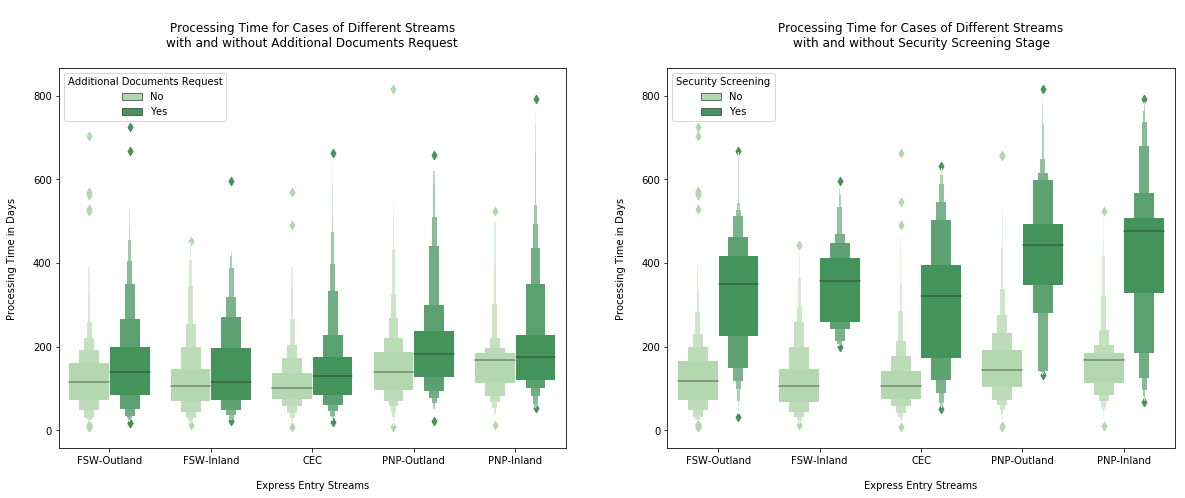

In [2584]:
# create two plot to analyze how the combinations of the countries of nationality and 
# the presence of optional processing stages can affect processing time
plt.figure(figsize = [20, 7])

# processing time for the combinations of countries of nationality and additional documents request stage
plt.subplot(1, 2, 1)
stream_n_ad = sb.boxenplot(data = complete_cases, y = 'processing_days', x = 'stream', hue = 
              'add_docs_request', palette = 'Greens', order = ['FSW-Outland', 'FSW-Inland', 'CEC', 
                                                               'PNP-Outland', 'PNP-Inland'])

plt.title(
    '\nProcessing Time for Cases of Different Streams\nwith and without Additional Documents Request\n')


plt.ylabel('Processing Time in Days\n')
plt.xlabel('\nExpress Entry Streams')
stream_n_ad.get_legend().set_title('Additional Documents Request')

# processing time for the combinations of countries of nationality and security screening stage
plt.subplot(1, 2, 2)
stream_n_ss = sb.boxenplot(data = complete_cases, y = 'processing_days', x = 'stream', hue = 
              'security_screening', palette = 'Greens', order = ['FSW-Outland', 'FSW-Inland', 'CEC', 
                                                               'PNP-Outland', 'PNP-Inland'])

plt.title(
    '\nProcessing Time for Cases of Different Streams\nwith and without Security Screening Stage\n')

plt.ylabel('Processing Time in Days\n')
plt.xlabel('\nExpress Entry Streams')
stream_n_ss.get_legend().set_title('Security Screening')


plt.show()

### Observation 4:

As expected the presence of both optional processing stages increases processing time for all Exptress Entry streams and the security screening stage affects much more than the additional documents request stage. 

However as we can see on the right plot the impact of the security screening is bigger for Provincial Nominee Program (PNP) cases especially for the cases applied from inside Canada.

_______

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature of interest?

The multivariate exploration clearly proved that the mail effect on the processing time has the presence of oprional processing stages: additional documents request and security screening and the combination of them strengthens this effect and maximizes processing time. 

The combination countries of nationality and residence with oprional processing stages increses processing time as well for applicants who has citizenship or residence in Iran, Iraq, Lebanon, Palestine, Syrian Arabic Republic, Jordan, Libya.

The combination of Express Entry streams with oprional processing stages also increses processing time for PNP cases and especially security screening stage.

#### Were there any interesting or surprising interactions between features?

I did not expect that the processing time of applications from the countries indicated above was relatively close to processing time of applications from other countries. i also did not suppose that PNP applicants who applied for immigration program from inside Canada had to wait the final desicion the longest among the applicants of all other Express Entry streams.